## Import Packages

In [1]:
import os
import sys
import os.path as path
import numpy as np
import pandas as pd
import csv
import pickle
import json
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from datetime import date, datetime, timedelta, time
from timeit import default_timer as timer
import time

In [2]:
from TrainModel_Helper import *

## Simulation Directory

In [3]:
sim_dir = '/p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI'

## `json` Input Files

In [4]:
json_extract_base = os.path.join(sim_dir, 'InputJson/Extract/json_extract_data')
json_prep_base = os.path.join(sim_dir, 'InputJson/Prep/json_prep_data_label')
json_train_base = os.path.join(sim_dir, 'InputJson/Train/json_train_model')

## Collect Metrics of Desired Trained Models

In [5]:
#json_extract_counts = [15]
json_extract_counts = range(30, 39)
json_prep_counts = [1, 2] #[1, 2, 3]
json_train_counts = [1, 3]#[3, 5, 1, 2]

In [6]:
trained_models_metrics = create_trained_models_metrics (\
                                  json_prep_base, json_prep_counts, \
                                  json_train_base, json_train_counts, \
                                  json_extract_base, json_extract_counts)

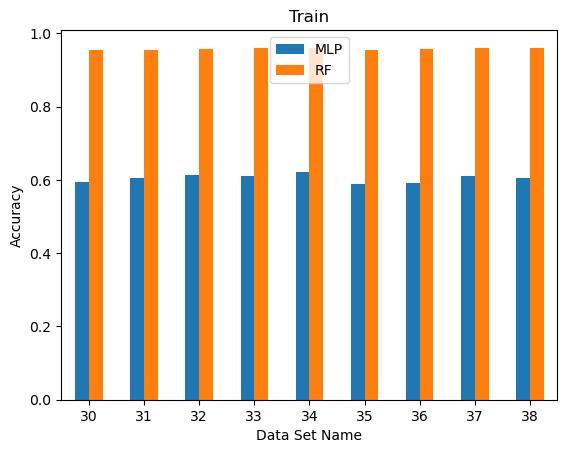

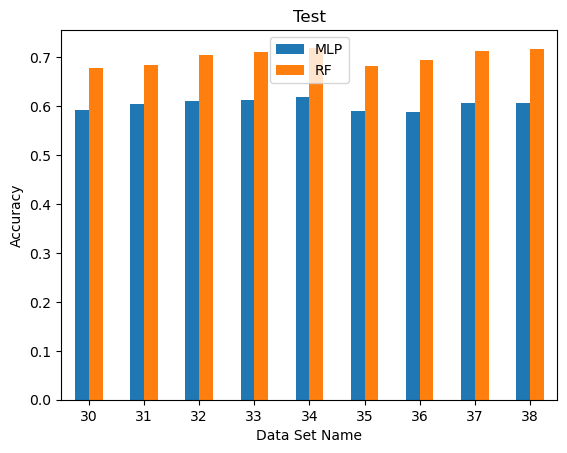

In [7]:
FM_label_type = "Regression"
df_train, df_test = plot_trained_models_metrics (FM_label_type, json_extract_counts, \
                                                 trained_models_metrics)

In [8]:
df_train

,MLP,RF
30,0.595344,0.954973
31,0.604697,0.955424
32,0.613474,0.958311
33,0.611006,0.959238
34,0.622230,0.960429
35,0.588071,0.955070
36,0.592512,0.957173
37,0.610548,0.959980
38,0.604258,0.960915


In [9]:
df_test

,MLP,RF
30,0.592474,0.679359
31,0.605045,0.684777
32,0.611703,0.704889
33,0.612999,0.710634
34,0.619176,0.719822
35,0.589535,0.682083
36,0.587378,0.694910
37,0.607153,0.713956
38,0.606747,0.717865


## Scatter Plots

In [10]:
json_extract_counts = [15, 16, 17] #[2, 3, 4, 5, 6, 7, 8]
json_prep_counts = [1]
json_train_counts = [1, 3]

In [11]:
max_data_size_scatter = 800
fig_size_x = 8
fig_size_y = 8
font_size  = 10
x_lim      = [0, 0.7]

In [12]:
data_identifier = "Train"

trained_model_file_name: dataset_015_label_001_Regression_model_001_MLP_model.pkl
Prediction Time for Train Data is 0.066 s
Accuracy for Train Data is: 0.5897513962095806
trained_model_file_name: dataset_016_label_001_Regression_model_001_MLP_model.pkl
Prediction Time for Train Data is 0.051 s
Accuracy for Train Data is: 0.615639965502169
trained_model_file_name: dataset_017_label_001_Regression_model_001_MLP_model.pkl
Prediction Time for Train Data is 0.058 s
Accuracy for Train Data is: 0.6004240488866979
trained_model_file_name: dataset_015_label_001_Regression_model_003_RF_model.pkl
Prediction Time for Train Data is 22.446 s
Accuracy for Train Data is: 0.9525258757180302
trained_model_file_name: dataset_016_label_001_Regression_model_003_RF_model.pkl
Prediction Time for Train Data is 27.435 s
Accuracy for Train Data is: 0.9574861327894286
trained_model_file_name: dataset_017_label_001_Regression_model_003_RF_model.pkl
Prediction Time for Train Data is 31.397 s
Accuracy for Train Dat

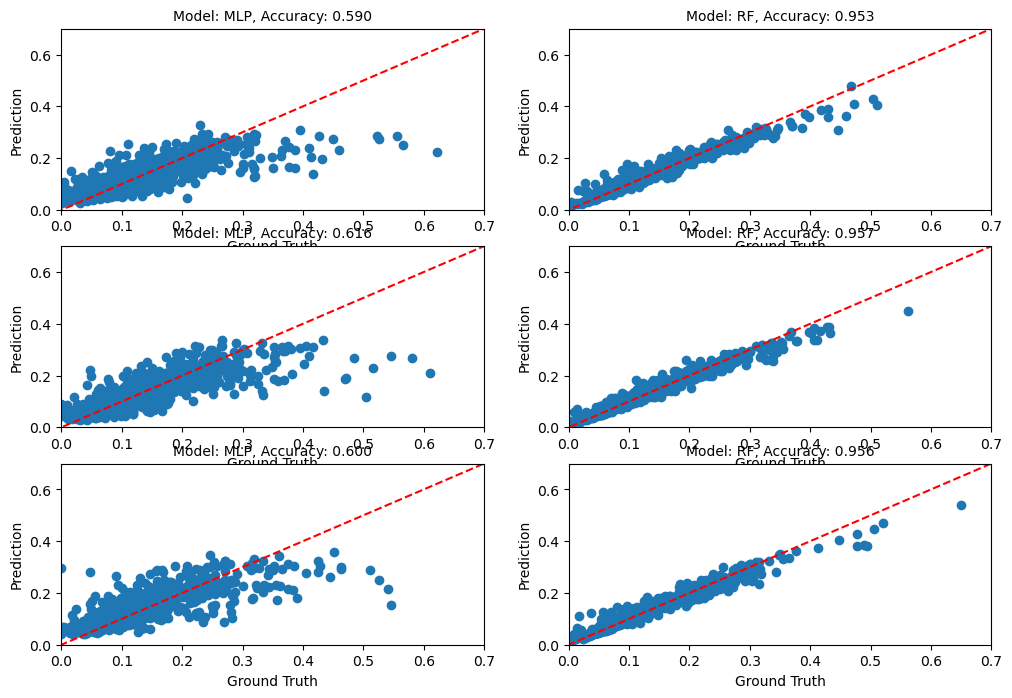

In [13]:
label_count = 1 # Regression
json_prep    = '%s_%03d.json'%(json_prep_base, label_count)
#print(json_prep)
with open(json_prep) as json_file_handle:
    json_content_prep_data = json.load(json_file_handle)
label_count = json_content_prep_data['label_defn']['label_count']
FM_label_type = json_content_prep_data['FM_labels']['label_type']
#print('label_count: {}, FM_label_type: {}\n'.format(label_count, FM_label_type))


fig, ax = plt.subplots(len(json_extract_counts), len(json_train_counts), figsize=(12, 8))

for train_count_ind, train_count in enumerate(json_train_counts):
    json_train   = '%s_%03d.json'%(json_train_base, train_count)
    #print(json_train)
    with open(json_train) as json_file_handle:
        json_content_train_model = json.load(json_file_handle)
    model_count = json_content_train_model['models']['model_count']
    model_name = json_content_train_model['models']['model_name'] # ['RF', SVM', 'MLP']
    #print('Model Count: {}, Model Name: {}\n'.format(model_count, model_name))

    for data_count_ind, data_count in enumerate(json_extract_counts):
        json_extract = '%s_%03d.json'%(json_extract_base, data_count)
        #print(json_extract)
        with open(json_extract) as json_file_handle:
            json_content_extract_data = json.load(json_file_handle)
        data_set_count = json_content_extract_data['data_set_defn']['data_set_count']
        #print('Data Set Count: {}'.format(data_set_count))

        # Names of trained model and related files
        trained_model_base_loc = json_content_train_model['paths']['trained_model_base_loc']
        trained_model_name = 'dataset_%03d_label_%03d_%s_model_%03d_%s'%(data_set_count, \
                                                    label_count, FM_label_type, \
                                                    model_count, model_name)

        trained_model_loc = os.path.join(trained_model_base_loc, trained_model_name)
        trained_model_file_name = '{}_model.pkl'.format(trained_model_name)
        
        train_data_features_file_name  = '{}_features_train.pkl'.format(trained_model_name)
        train_data_labels_file_name    = '{}_labels_train.pkl'.format(trained_model_name)

        test_data_features_file_name   = '{}_features_test.pkl'.format(trained_model_name)
        test_data_labels_file_name     = '{}_labels_test.pkl'.format(trained_model_name)
        
        print('trained_model_file_name: {}'.format(trained_model_file_name))
        #print('train_data_features_file_name: {}'.format(train_data_features_file_name))
        #print('train_data_labels_file_name: {}'.format(train_data_labels_file_name))
        #print('test_data_features_file_name: {}'.format(test_data_features_file_name))
        #print('test_data_labels_file_name: {}'.format(test_data_labels_file_name))
        
        trained_model_file = os.path.join(trained_model_loc, trained_model_file_name)
        model = pickle.load(open(trained_model_file, 'rb'))
        #print ('\nLoaded the ML model file at: {}\n'.format(trained_model_file))
        #print ('The model loaded is: {} \n'.format(model))
        
        if (data_identifier == "Train"):
            #print('Loading the saved features and labels used in training')
            features_train = pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_features_file_name), 'rb'))
            labels_train   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_labels_file_name), 'rb'))
            labels_pred_train = predict(model, features_train, "Train Data")
            accuracy_train = get_accuracy_score(model, FM_label_type, \
                                   features_train, labels_train, labels_pred_train,\
                                   "Train Data")
            labels_gt = labels_train
            labels_pred = labels_pred_train
            accuracy = accuracy_train
        else:
            #print('Loading the saved features and labels meant for testing')
            features_test = pickle.load(open(os.path.join(\
                            trained_model_loc, test_data_features_file_name), 'rb'))
            labels_test   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, test_data_labels_file_name), 'rb'))
            labels_pred_test = predict(model, features_test, "Test Data")
            accuracy_test = get_accuracy_score(model, FM_label_type, \
                                   features_test, labels_test, labels_pred_test,\
                                   "Test Data")
            
            labels_gt = labels_test
            labels_pred = labels_pred_test
            accuracy = accuracy_test
        
        labels_gt_range = [labels_gt.min(), labels_gt.max()]
        data_indices = range(len(labels_gt))
        if (max_data_size_scatter < 1):
            data_ind_subset = data_indices
        else:
            data_ind_subset = random.sample(data_indices, k = max_data_size_scatter)
            
        ax[data_count_ind, train_count_ind].scatter(labels_gt[data_ind_subset], labels_pred[data_ind_subset])
        ax[data_count_ind, train_count_ind].plot(labels_gt_range, labels_gt_range, '--r')
        ax[data_count_ind, train_count_ind].set_xlabel('Ground Truth', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_ylabel('Prediction', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_title('Model: {}, Accuracy: {:.3f}'.format(model_name, accuracy), fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_xlim(x_lim)
        ax[data_count_ind, train_count_ind].set_ylim(x_lim)
        #ax[data_count_ind, train_count_ind].set_yticks(fontsize = font_size, rotation = 0)
        #ax[data_count_ind, train_count_ind].set_xticks(fontsize = font_size, rotation = 0)
        #print('\n')

#print('\n')      

In [14]:
data_identifier = "Test"

Prediction Time for Test Data is 0.028 s
Accuracy for Test Data is: 0.5879379671618105
Prediction Time for Test Data is 0.016 s
Accuracy for Test Data is: 0.6117678700629544
Prediction Time for Test Data is 0.016 s
Accuracy for Test Data is: 0.5996179393058454
Prediction Time for Test Data is 7.512 s
Accuracy for Test Data is: 0.6605810826489977
Prediction Time for Test Data is 7.605 s
Accuracy for Test Data is: 0.6963086407744827
Prediction Time for Test Data is 7.639 s
Accuracy for Test Data is: 0.6895464119264241


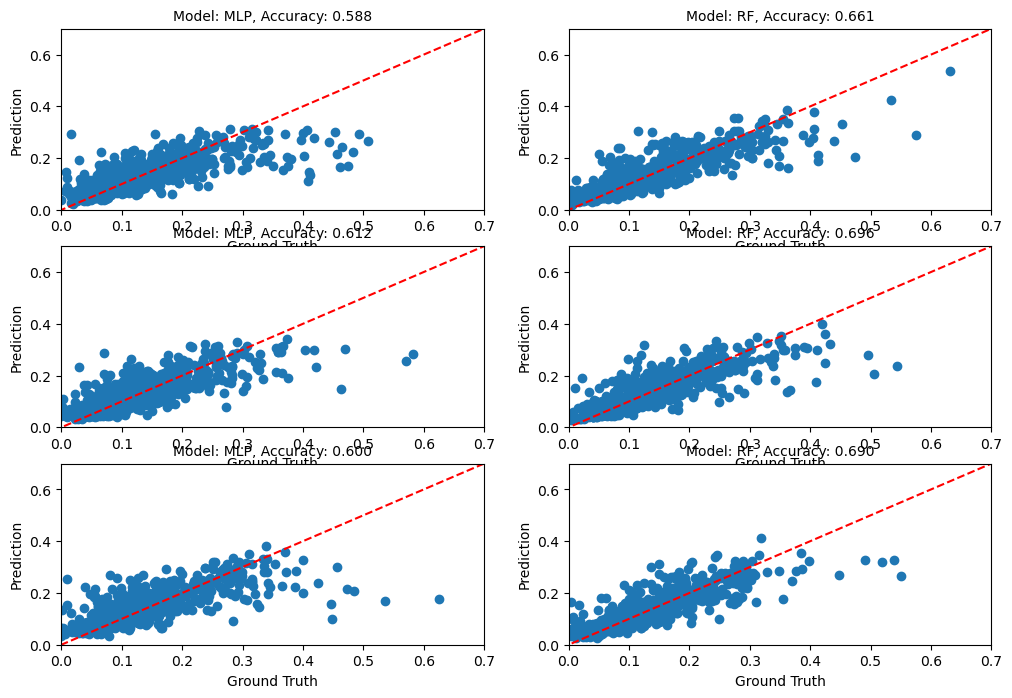

In [15]:
label_count = 1 # Regression
json_prep    = '%s_%03d.json'%(json_prep_base, label_count)
#print(json_prep)
with open(json_prep) as json_file_handle:
    json_content_prep_data = json.load(json_file_handle)
label_count = json_content_prep_data['label_defn']['label_count']
FM_label_type = json_content_prep_data['FM_labels']['label_type']
#print('label_count: {}, FM_label_type: {}\n'.format(label_count, FM_label_type))


fig, ax = plt.subplots(len(json_extract_counts), len(json_train_counts), figsize=(12, 8))

for train_count_ind, train_count in enumerate(json_train_counts):
    json_train   = '%s_%03d.json'%(json_train_base, train_count)
    #print(json_train)
    with open(json_train) as json_file_handle:
        json_content_train_model = json.load(json_file_handle)
    model_count = json_content_train_model['models']['model_count']
    model_name = json_content_train_model['models']['model_name'] # ['RF', SVM', 'MLP']
    #print('Model Count: {}, Model Name: {}\n'.format(model_count, model_name))

    for data_count_ind, data_count in enumerate(json_extract_counts):
        json_extract = '%s_%03d.json'%(json_extract_base, data_count)
        #print(json_extract)
        with open(json_extract) as json_file_handle:
            json_content_extract_data = json.load(json_file_handle)
        data_set_count = json_content_extract_data['data_set_defn']['data_set_count']
        #print('Data Set Count: {}'.format(data_set_count))

        # Names of trained model and related files
        trained_model_base_loc = json_content_train_model['paths']['trained_model_base_loc']
        trained_model_name = 'dataset_%03d_label_%03d_%s_model_%03d_%s'%(data_set_count, \
                                                    label_count, FM_label_type, \
                                                    model_count, model_name)

        trained_model_loc = os.path.join(trained_model_base_loc, trained_model_name)
        trained_model_file_name = '{}_model.pkl'.format(trained_model_name)
        
        train_data_features_file_name  = '{}_features_train.pkl'.format(trained_model_name)
        train_data_labels_file_name    = '{}_labels_train.pkl'.format(trained_model_name)

        test_data_features_file_name   = '{}_features_test.pkl'.format(trained_model_name)
        test_data_labels_file_name     = '{}_labels_test.pkl'.format(trained_model_name)
        
        #print('trained_model_file_name: {}'.format(trained_model_file_name))
        #print('train_data_features_file_name: {}'.format(train_data_features_file_name))
        #print('train_data_labels_file_name: {}'.format(train_data_labels_file_name))
        #print('test_data_features_file_name: {}'.format(test_data_features_file_name))
        #print('test_data_labels_file_name: {}'.format(test_data_labels_file_name))
        
        trained_model_file = os.path.join(trained_model_loc, trained_model_file_name)
        model = pickle.load(open(trained_model_file, 'rb'))
        #print ('\nLoaded the ML model file at: {}\n'.format(trained_model_file))
        #print ('The model loaded is: {} \n'.format(model))
        
        if (data_identifier == "Train"):
            #print('Loading the saved features and labels used in training')
            features_train = pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_features_file_name), 'rb'))
            labels_train   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_labels_file_name), 'rb'))
            labels_pred_train = predict(model, features_train, "Train Data")
            accuracy_train = get_accuracy_score(model, FM_label_type, \
                                   features_train, labels_train, labels_pred_train,\
                                   "Train Data")
            labels_gt = labels_train
            labels_pred = labels_pred_train
            accuracy = accuracy_train
        else:
            #print('Loading the saved features and labels meant for testing')
            features_test = pickle.load(open(os.path.join(\
                            trained_model_loc, test_data_features_file_name), 'rb'))
            labels_test   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, test_data_labels_file_name), 'rb'))
            labels_pred_test = predict(model, features_test, "Test Data")
            accuracy_test = get_accuracy_score(model, FM_label_type, \
                                   features_test, labels_test, labels_pred_test,\
                                   "Test Data")
            
            labels_gt = labels_test
            labels_pred = labels_pred_test
            accuracy = accuracy_test
        
        labels_gt_range = [labels_gt.min(), labels_gt.max()]
        data_indices = range(len(labels_gt))
        if (max_data_size_scatter < 1):
            data_ind_subset = data_indices
        else:
            data_ind_subset = random.sample(data_indices, k = max_data_size_scatter)
            
        ax[data_count_ind, train_count_ind].scatter(labels_gt[data_ind_subset], labels_pred[data_ind_subset])
        ax[data_count_ind, train_count_ind].plot(labels_gt_range, labels_gt_range, '--r')
        ax[data_count_ind, train_count_ind].set_xlabel('Ground Truth', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_ylabel('Prediction', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_title('Model: {}, Accuracy: {:.3f}'.format(model_name, accuracy), fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_xlim(x_lim)
        ax[data_count_ind, train_count_ind].set_ylim(x_lim)
        #ax[data_count_ind, train_count_ind].set_yticks(fontsize = font_size, rotation = 0)
        #ax[data_count_ind, train_count_ind].set_xticks(fontsize = font_size, rotation = 0)
        #print('\n')

#print('\n')      